# Exploratory Data Analysis

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('Travel.csv')

In [ ]:
df.sample(10, random_state=100)

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
3476,203476,1,40.0,Company Invited,1,9.0,Salaried,Female,3,5.0,Basic,5.0,Unmarried,4.0,1,3,0,1.0,Executive,22324.0
1011,201011,0,36.0,Self Enquiry,3,9.0,Small Business,Fe Male,2,3.0,Deluxe,4.0,Unmarried,4.0,1,4,0,1.0,Manager,24278.0
159,200159,0,34.0,Company Invited,3,8.0,Small Business,Female,3,3.0,Basic,3.0,Divorced,7.0,0,5,1,2.0,Executive,17231.0
2477,202477,1,40.0,Self Enquiry,3,12.0,Large Business,Male,3,4.0,Deluxe,3.0,Divorced,5.0,0,2,0,2.0,Manager,20764.0
291,200291,0,36.0,Self Enquiry,1,NaN,Large Business,Male,1,3.0,Deluxe,4.0,Single,5.0,0,2,1,0.0,Manager,19485.0
1618,201618,0,41.0,Self Enquiry,1,15.0,Salaried,Male,3,3.0,Basic,5.0,Married,3.0,0,1,0,0.0,Executive,17238.0
1983,201983,1,20.0,Self Enquiry,1,16.0,Small Business,Male,2,3.0,Basic,3.0,Single,2.0,1,5,1,1.0,Executive,16009.0
1740,201740,0,55.0,Self Enquiry,1,6.0,Small Business,Male,2,3.0,King,5.0,Single,1.0,1,1,1,1.0,VP,34045.0
3298,203298,0,46.0,Self Enquiry,1,14.0,Small Business,Female,3,4.0,Basic,3.0,Divorced,6.0,1,3,1,1.0,Executive,23155.0
4705,204705,1,36.0,Self Enquiry,3,11.0,Large Business,Male,3,4.0,Standard,5.0,Unmarried,2.0,1,4,1,2.0,Senior Manager,28260.0


## Descriptive Statistics

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CustomerID                4888 non-null   int64  
 1   ProdTaken                 4888 non-null   int64  
 2   Age                       4662 non-null   float64
 3   TypeofContact             4863 non-null   object 
 4   CityTier                  4888 non-null   int64  
 5   DurationOfPitch           4637 non-null   float64
 6   Occupation                4888 non-null   object 
 7   Gender                    4888 non-null   object 
 8   NumberOfPersonVisiting    4888 non-null   int64  
 9   NumberOfFollowups         4843 non-null   float64
 10  ProductPitched            4888 non-null   object 
 11  PreferredPropertyStar     4862 non-null   float64
 12  MaritalStatus             4888 non-null   object 
 13  NumberOfTrips             4748 non-null   float64
 14  Passport

The data contains 4888 rows of customer records with descriptions for each column as follows:
1. `CustomerID`: Unique customer ID
2. `ProdTaken`: A binary indicator (0 or 1) that shows whether the customer has purchased a holiday package (1) or not (0).
3. `Age`: The age of the customer.
4. `TypeofContact`: The type of contact used to contact the customer ('Company Invited' or 'Self Inquiry').
5. `CityTier`: The level of the customer's city of residence (referring to the level of development or city status)(Value; 1-3).
6. `DurationOfPitch`: Presentation duration in minutes when offering vacation packages to customers.
7. `Occupation`: Customer occupation ('Salaried', 'Small Business', or 'Large Business').
8. `Gender`: Customer's gender (Male and Female).
9. `NumberOfPersonVisiting`: The number of people who will visit (related to the number of family members or business associates who will join the holiday trip).
10. `NumberOfFollowups`: The number of follow-ups that have been done with customers.
11. `ProductPitched`: Products offered to customers.(Basic, Deluxe, Standard, Super Deluxe, King)
12. `PreferredPropertyStar`: The property star level desired by the customer.(3-5 stars)
13. `Marital Status`: The customer's marital status.(Single, Married, Divorce, Unmaried)
14. `NumberOfTrips`: Number of trips that have been made by previous customers.
15. `Passport`: A binary indicator (0 or 1) that shows whether the customer has a passport (1) or not (0).
16. `PitchSatisfactionScore`: Score of customer satisfaction on offer presentation.(Value;1-5)
17. `OwnCar`: A binary indicator (0 or 1) that shows whether the customer owns a car (1) or not (0).
18. `NumberOfChildrenVisiting`: Number of children who took part in the holiday trip.
19. `Designation`: Customer job title or position. (Executive, Manager, Senior Manager, AVP, VP)
20. `MonthlyIncome`: The customer's monthly income.


In [ ]:
num_cols = ['CustomerID','Age','DurationOfPitch','NumberOfTrips','MonthlyIncome']
cat_cols = [col for col in df.columns if col not in num_cols]
df[cat_cols] = df[cat_cols].astype(object)

In [ ]:
df[num_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,4888.0,202443.500000,1411.188388,200000.0,201221.75,202443.5,203665.25,204887.0
Age,4662.0,37.622265,9.316387,18.0,31.00,36.0,44.00,61.0
DurationOfPitch,4637.0,15.490835,8.519643,5.0,9.00,13.0,20.00,127.0
NumberOfTrips,4748.0,3.236521,1.849019,1.0,2.00,3.0,4.00,22.0
MonthlyIncome,4655.0,23619.853491,5380.698361,1000.0,20346.00,22347.0,25571.00,98678.0


1. The number of rows in the dataset is 4,888.

2. There are several columns that have missing values, namely the Age, DurationOfPitch, NumberOfTrips, and MonthlyIncome columns. These columns need to be handled with the appropriate value entry method before further analysis is carried out.

3. The average age (Age) of customers in the dataset is 37.62 years with a standard deviation of 9.32. The age distribution tends to approach the normal distribution.

4. Presentation duration (DurationOfPitch), number of trips (NumberOfTrips), and monthly income (MonthlyIncome) have positive skewness, which indicates outliers or outliers in the data.

5. The average monthly income of customers is 23,619.85.

In [ ]:
for col in cat_cols:
    print(col)
    print(df[col].value_counts())
    print()

ProdTaken
0    3968
1     920
Name: ProdTaken, dtype: int64

TypeofContact
Self Enquiry       3444
Company Invited    1419
Name: TypeofContact, dtype: int64

CityTier
1    3190
3    1500
2     198
Name: CityTier, dtype: int64

Occupation
Salaried          2368
Small Business    2084
Large Business     434
Free Lancer          2
Name: Occupation, dtype: int64

Gender
Male       2916
Female     1817
Fe Male     155
Name: Gender, dtype: int64

NumberOfPersonVisiting
3    2402
2    1418
4    1026
1      39
5       3
Name: NumberOfPersonVisiting, dtype: int64

NumberOfFollowups
4.0    2068
3.0    1466
5.0     768
2.0     229
1.0     176
6.0     136
Name: NumberOfFollowups, dtype: int64

ProductPitched
Basic           1842
Deluxe          1732
Standard         742
Super Deluxe     342
King             230
Name: ProductPitched, dtype: int64

PreferredPropertyStar
3.0    2993
5.0     956
4.0     913
Name: PreferredPropertyStar, dtype: int64

MaritalStatus
Married      2340
Divorced      950
Si

1. There is a typo in the Gender column where 'Fe male' should be 'Female'
2. There is a different use of terms for 'Unmarried' and 'Single' where both statuses are the same

In [ ]:
df['Gender'] = df['Gender'].replace({'Fe Male': 'Female'})
df['MaritalStatus'] = df['MaritalStatus'].replace({'Unmarried': 'Single'})

In [ ]:
df[cat_cols].describe().T

,count,unique,top,freq
ProdTaken,4888,2,0,3968
TypeofContact,4863,2,Self Enquiry,3444
CityTier,4888,3,1,3190
Occupation,4888,4,Salaried,2368
Gender,4888,2,Male,2916
NumberOfPersonVisiting,4888,5,3,2402
NumberOfFollowups,4843.0,6.0,4.0,2068.0
ProductPitched,4888,5,Basic,1842
PreferredPropertyStar,4862.0,3.0,3.0,2993.0
MaritalStatus,4888,3,Married,2340


1. In the TypeofContact, NumberOfFollowups, PreferredPropertyStar, NumberOfChildrenVisiting column there is a missing value
2. In the ProdTaken, TypeofContact, and Gender columns there are unbalanced data
3. Most customers are on CityTier 1.
4. The majority of customers do not have a passport (Passport) and own a car (OwnCar).
5. The most common PitchSatisfactionScore is 3 from a scale of 1 to 5.
6. The majority of customers have a total of 1 children visiting (NumberOfChildrenVisiting).

## Univariate Analysis

In [ ]:
# define numerical & categorical columns

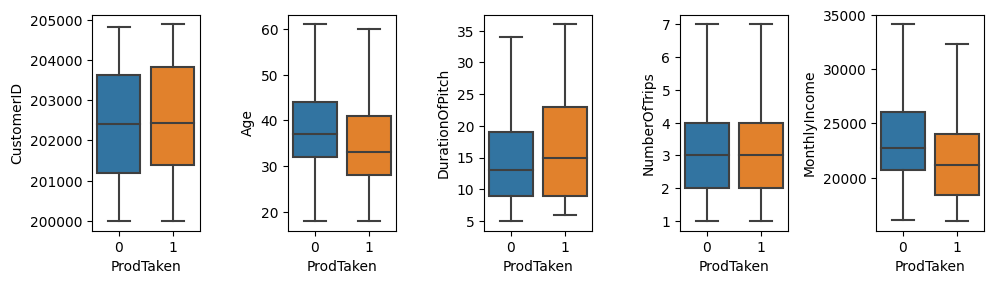

In [ ]:
plt.figure(figsize=(12,8))
for i in range(0, len(num_cols)):
    plt.subplot(3, 6, i+1)
    sns.boxplot(y=df[num_cols[i]], x=df['ProdTaken'],showfliers=False , orient='v')
    plt.tight_layout()

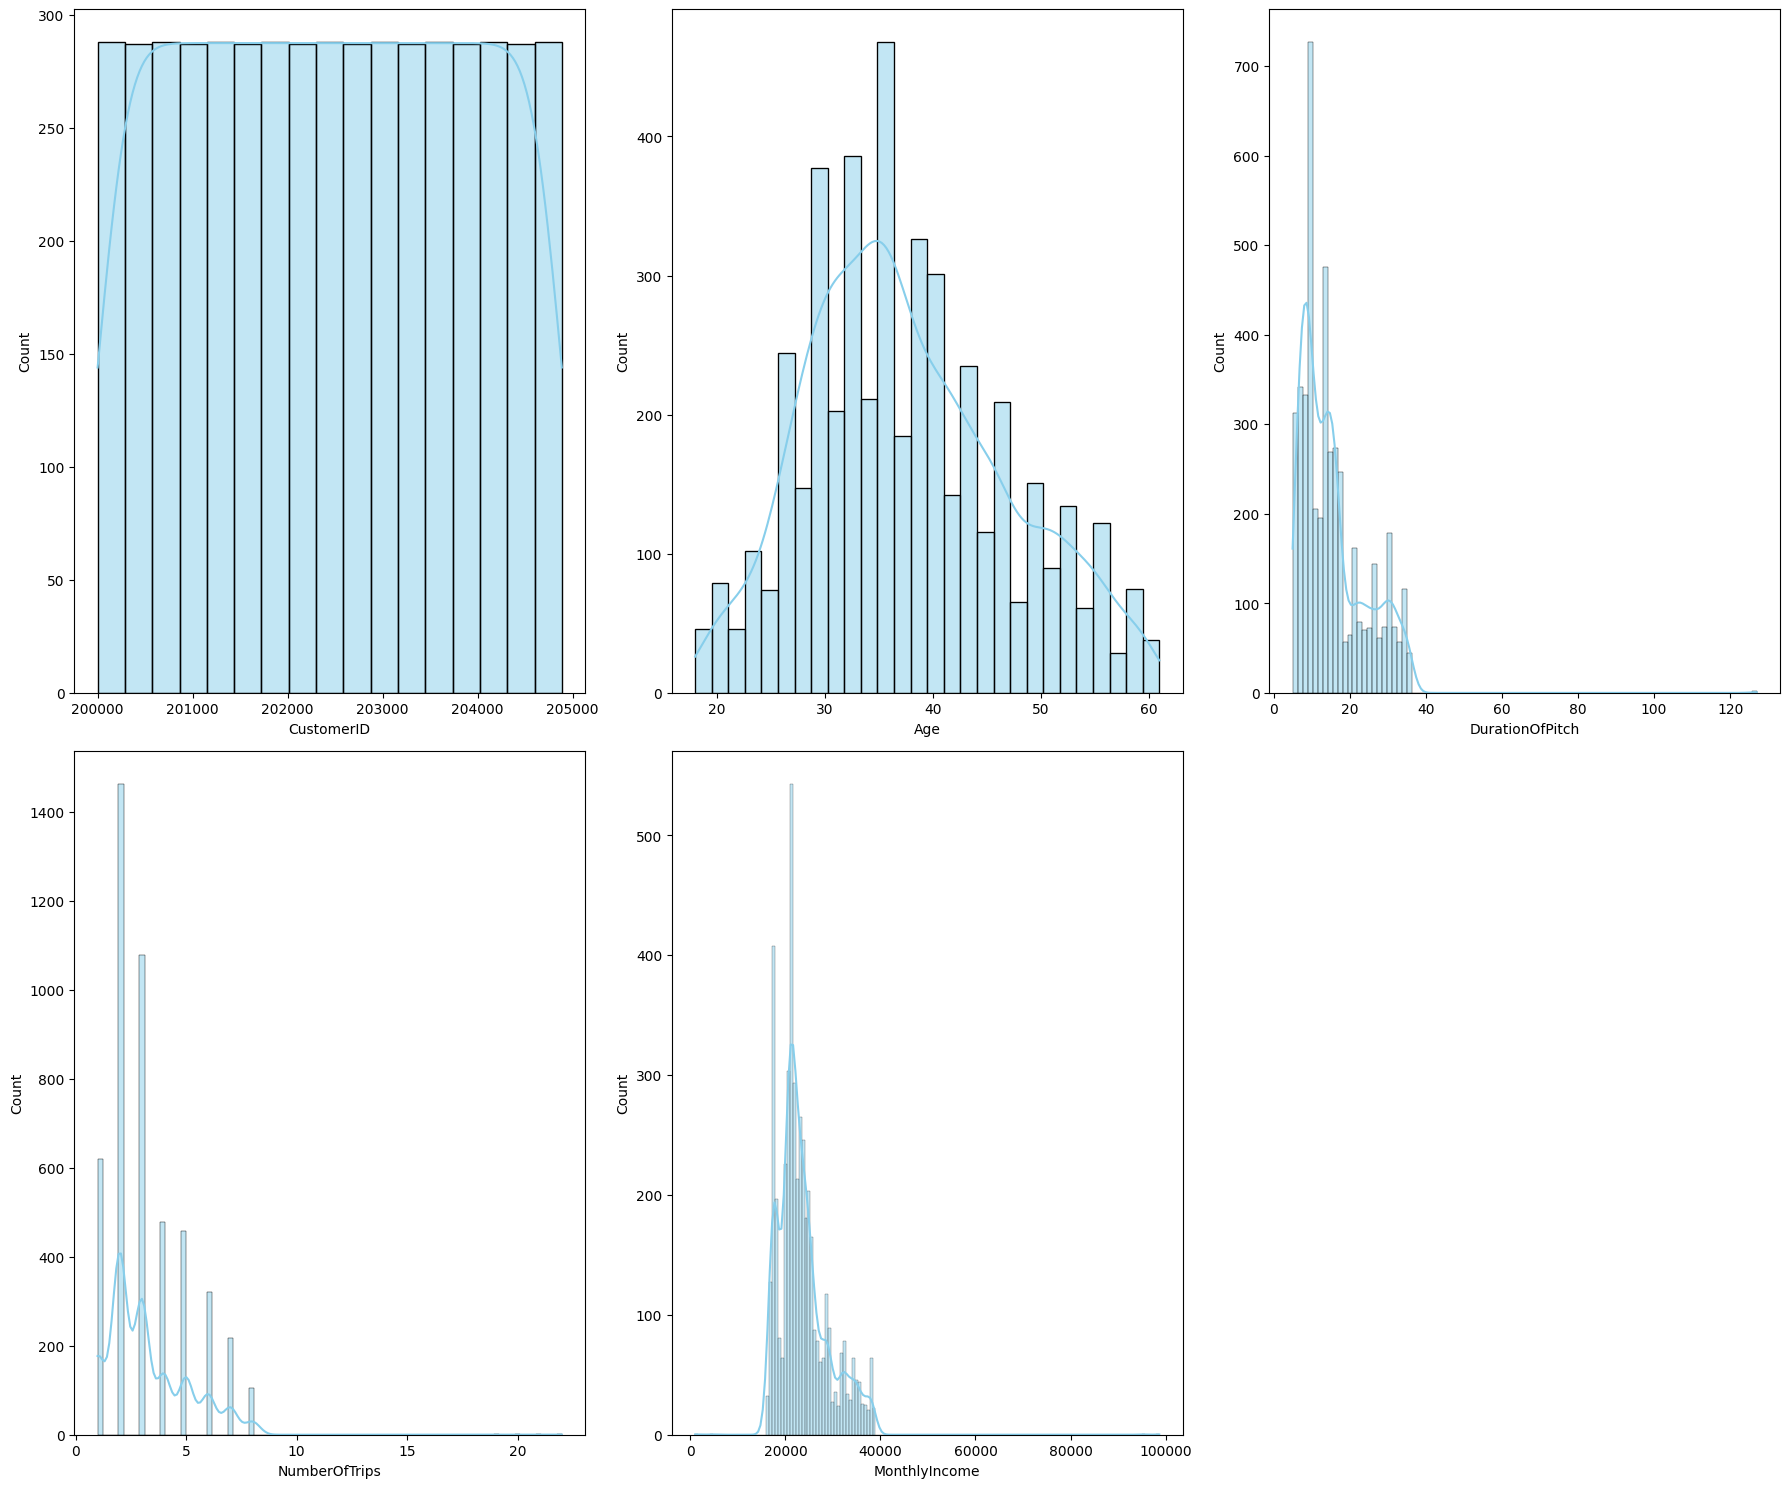

In [ ]:
num_cols_count = len(num_cols)
num_rows = math.ceil(num_cols_count / 3)
num_figures = math.ceil(num_cols_count / 9)

for f in range(num_figures):
    start_idx = f * 9
    end_idx = min(start_idx + 9, num_cols_count)
    plt.figure(figsize=(18, 15))
    for i, col in enumerate(num_cols[start_idx:end_idx]):
        plt.subplot(num_rows, 3, i+1)
        sns.histplot(df[col].dropna(), kde=True, color='skyblue')
        plt.xlabel(col)
        plt.ylabel('Count')
    plt.tight_layout()
    plt.show()

Conclusion :
1. The distribution of the Age column tends to approach the normal distribution, indicating a balanced distribution of values.
2. the DurationOfPitch, NumberOfTrips, and MonthlyIncome columns have positive skewness, indicating the presence of outliers or outliers in the data. These outliers can have a significant effect on the results of the analysis.

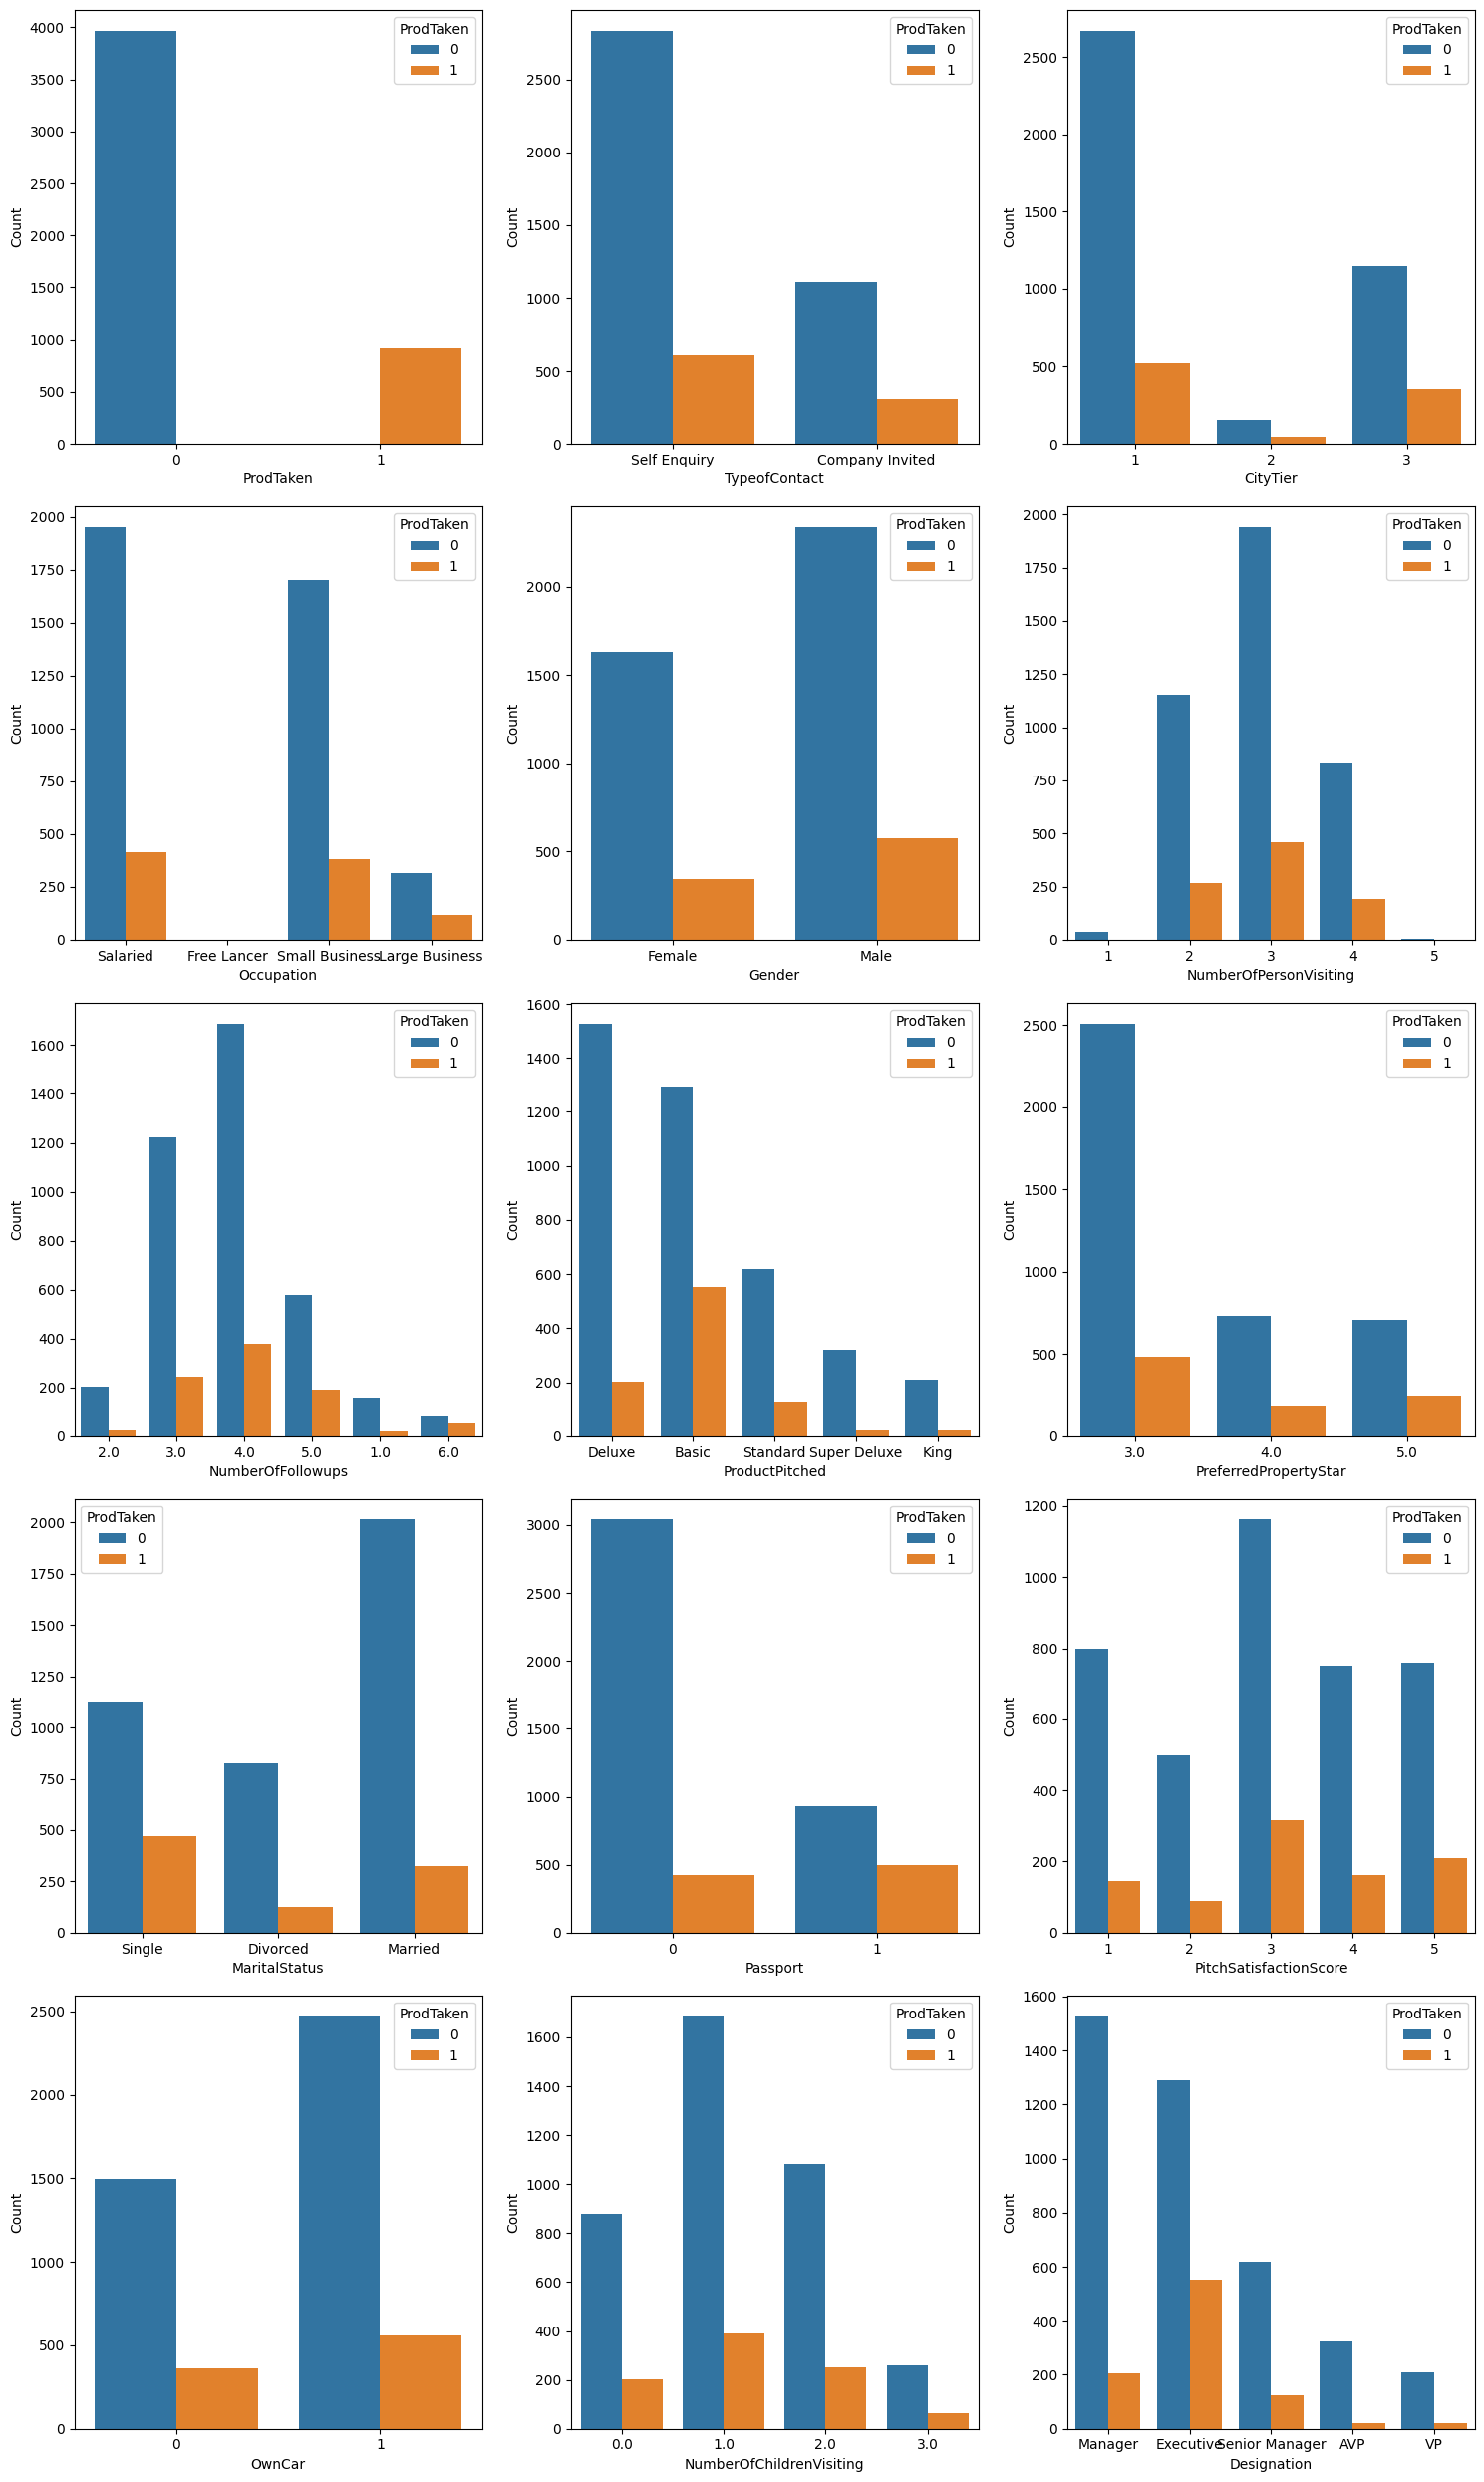

In [ ]:
# Univariate analysis for categorical columns
num_cat_cols = len(cat_cols)
num_rows = (num_cat_cols - 1) // 3 + 1
plt.figure(figsize=(15, 5*num_rows))
for i, col in enumerate(cat_cols):
    plt.subplot(num_rows, 3, i+1)
    sns.countplot(x=col, data=df, hue=df['ProdTaken'])
    plt.xlabel(col)
    plt.ylabel('Count')
plt.tight_layout()
plt.show()

1. In the TypeofContact column, there are more Self Inquiry distributions than Company Visited
2. In the Occupation column, there are more Salaried and Small Business customers compared to the others, and the Free Lancer will later be deleted because they have no value
4. In the ProductPitched column, the basic and Deluxe package types have the highest sales
5. In the Designation column, customers with Executive and Manager positions have the highest sales

## Multivariate Analysis

<ipython-input-65-493e948be1a1>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


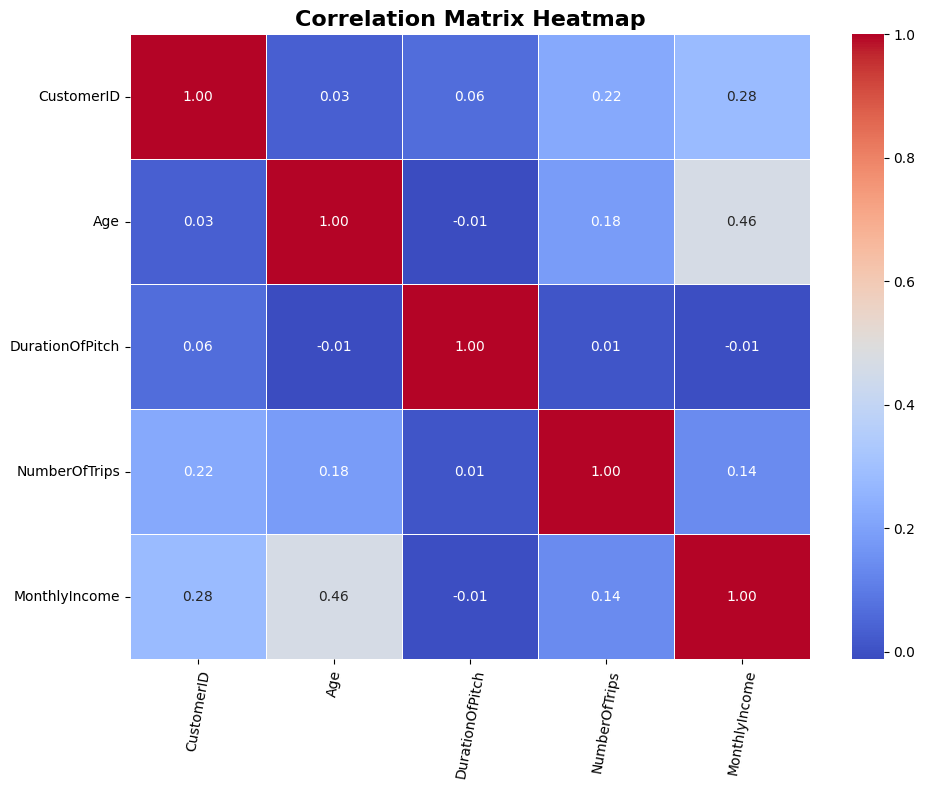

In [ ]:
corr_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix Heatmap', fontsize=16, fontweight='bold')
plt.xticks(rotation=80)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

We can see there is no strong correlation between any of the numeric columns.

## Business Insight and Visualization

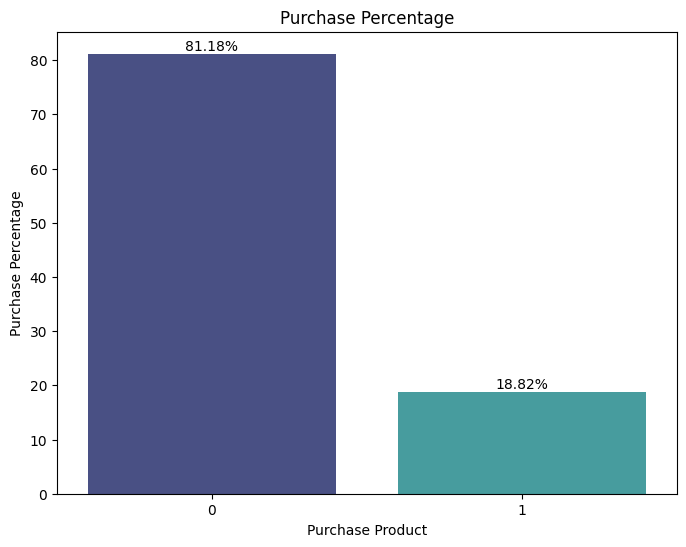

In [ ]:
# Calculate the purchase percentage by Passport
purchase_percentage = df.groupby('ProdTaken').size() / len(df) * 100

# Plot the purchase percentage
plt.figure(figsize=(8, 6))
ax = sns.barplot(x=purchase_percentage.index, y=purchase_percentage.values, palette='mako')
plt.xlabel('Purchase Product')
plt.ylabel('Purchase Percentage')
plt.title('Purchase Percentage')

# Display percentages on the bars
for i, value in enumerate(purchase_percentage):
    ax.text(i, value, f'{value:.2f}%', ha='center', va='bottom', color='black')

plt.show()

Of all customers, only 18.82% of them purchased the offered holiday packages.

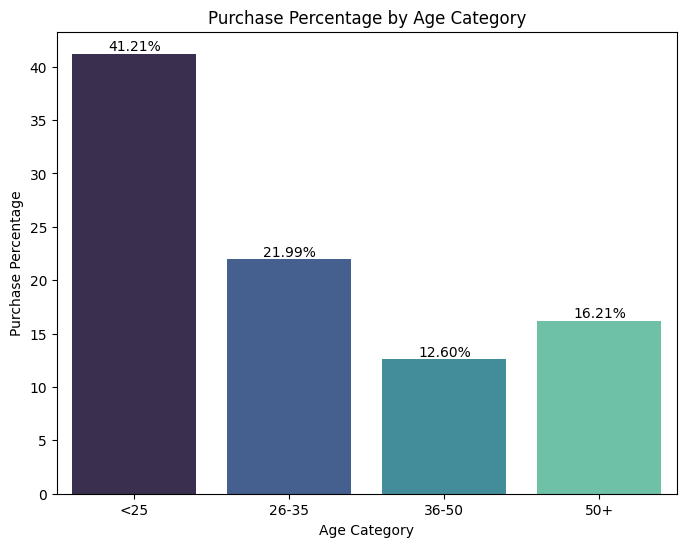

In [ ]:
# Calculate the purchase percentage by AgeCategory
df['AgeCategory'] = pd.cut(df['Age'], bins=[0, 25, 35, 50, 100], labels=['<25', '26-35', '36-50', '50+'])
purchase_percentage = df.groupby('AgeCategory')['ProdTaken'].mean() * 100

# Plot the purchase percentage by AgeCategory
plt.figure(figsize=(8, 6))
ax = sns.barplot(x=purchase_percentage.index, y=purchase_percentage.values, palette='mako')
plt.xlabel('Age Category')
plt.ylabel('Purchase Percentage')
plt.title('Purchase Percentage by Age Category')

# Display percentages on the bars
for i, value in enumerate(purchase_percentage):
    ax.text(i, value, f'{value:.2f}%', ha='center', va='bottom', color='black')

plt.show()

When viewed from the purchase ratio of each age category, it can be seen that customers who are less than 25 years old have the highest purchasing power.

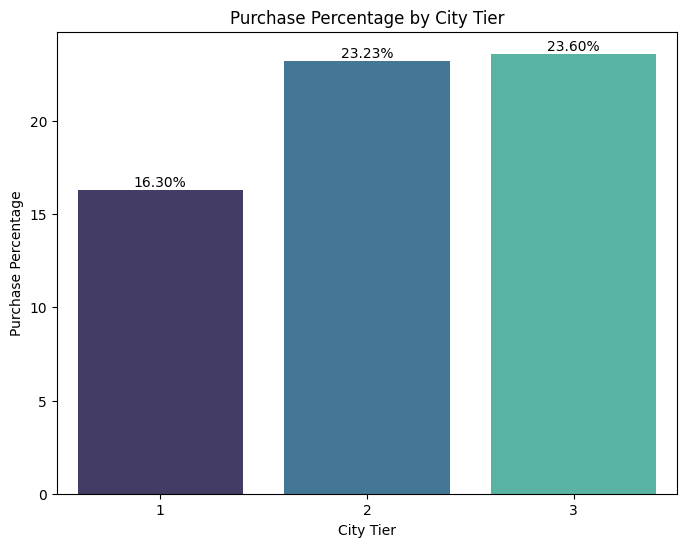

In [ ]:
# Calculate the purchase percentage by CityTier
purchase_percentage = df.groupby('CityTier')['ProdTaken'].mean() * 100

# Plot the purchase percentage by CityTier
plt.figure(figsize=(8, 6))
ax = sns.barplot(x=purchase_percentage.index, y=purchase_percentage.values, palette='mako')
plt.xlabel('City Tier')
plt.ylabel('Purchase Percentage')
plt.title('Purchase Percentage by City Tier')

# Display percentages on the bars
for i, value in enumerate(purchase_percentage):
    ax.text(i, value, f'{value:.2f}%', ha='center', va='bottom', color='black')

plt.show()

The higher the city tier, the higher the purchasing power of customers.


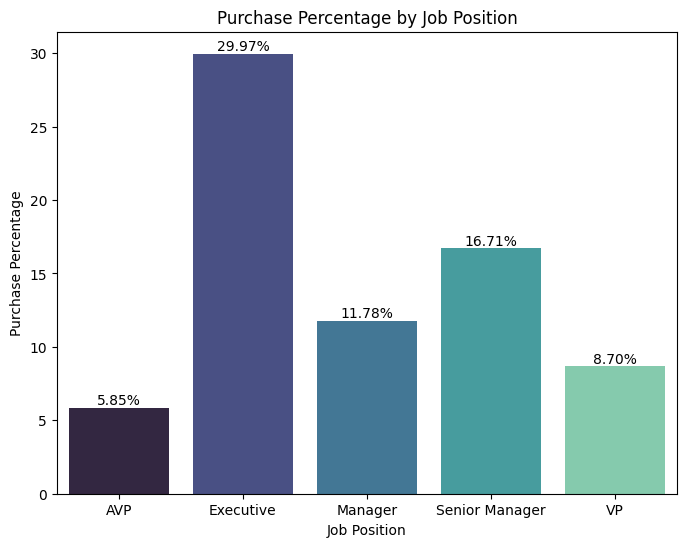

In [ ]:
# Calculate the purchase percentage by Job Position
purchase_percentage = df.groupby('Designation')['ProdTaken'].mean() * 100

# Plot the purchase percentage by Job Position
plt.figure(figsize=(8, 6))
ax = sns.barplot(x=purchase_percentage.index, y=purchase_percentage.values, palette='mako')
plt.xlabel('Job Position')
plt.ylabel('Purchase Percentage')
plt.title('Purchase Percentage by Job Position')

# Display percentages on the bars
for i, value in enumerate(purchase_percentage):
    ax.text(i, value, f'{value:.2f}%', ha='center', va='bottom', color='black')

plt.show()

From the job position, customers who work as executives have the highest percentage of purchases.

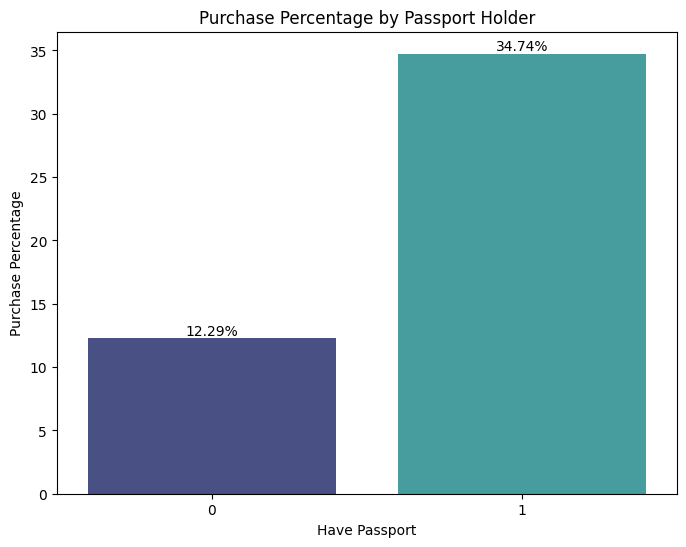

In [ ]:
# Calculate the purchase percentage by CityTier
purchase_percentage = df.groupby('Passport')['ProdTaken'].mean() * 100

# Plot the purchase percentage by CityTier
plt.figure(figsize=(8, 6))
ax = sns.barplot(x=purchase_percentage.index, y=purchase_percentage.values, palette='mako')
plt.xlabel('Have Passport')
plt.ylabel('Purchase Percentage')
plt.title('Purchase Percentage by Passport Holder')

# Display percentages on the bars
for i, value in enumerate(purchase_percentage):
    ax.text(i, value, f'{value:.2f}%', ha='center', va='bottom', color='black')

plt.show()

It can be seen here that there is a significant difference in the percentage of purchases between passport holders and non-passport holders where passport holders have more purchasing power.

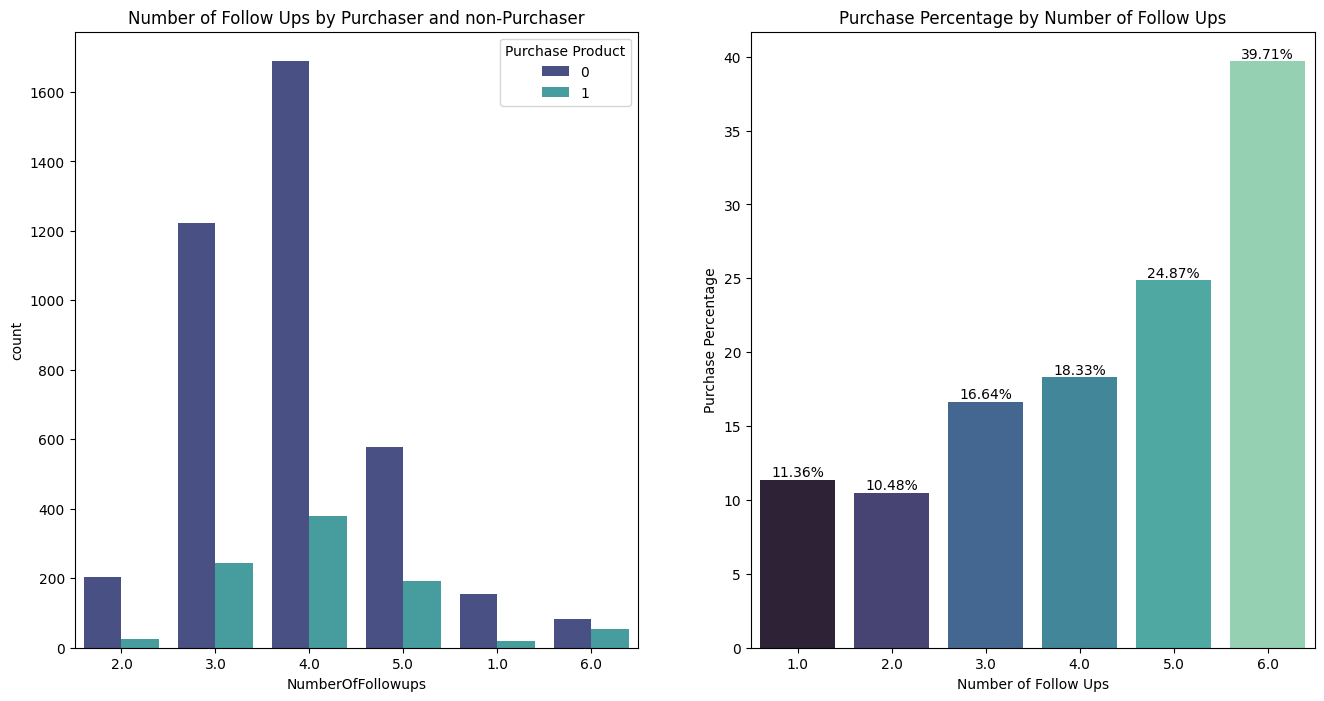

In [ ]:
# Plot the Number of Follow Ups by ProdTaken
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(16,8))
sns.countplot(x='NumberOfFollowups', data=df,hue='ProdTaken', palette='mako',ax=ax1)
plt.xlabel('Number of Follow Ups')
ax1.legend(title='Purchase Product')
ax1.title.set_text('Number of Follow Ups by Purchaser and non-Purchaser')

# Calculate the purchase percentage by CityTier
purchase_percentage = df.groupby('NumberOfFollowups')['ProdTaken'].mean() * 100

# Plot the purchase percentage by Number of Follow Ups
sns.barplot(x=purchase_percentage.index, y=purchase_percentage.values, palette='mako',ax=ax2)
plt.xlabel('Number of Follow Ups')
plt.ylabel('Purchase Percentage')
ax2.title.set_text('Purchase Percentage by Number of Follow Ups')

# Display percentages on the bars
for i, value in enumerate(purchase_percentage):
    ax2.text(i, value, f'{value:.2f}%', ha='center', va='bottom', color='black')

plt.show()

From the visualization above, it can be seen that the total follow-up of fewer than 6 times has a much higher total of customers who did not buy than customers who were followed up 6 times with the highest conversion rate of 39.71%.


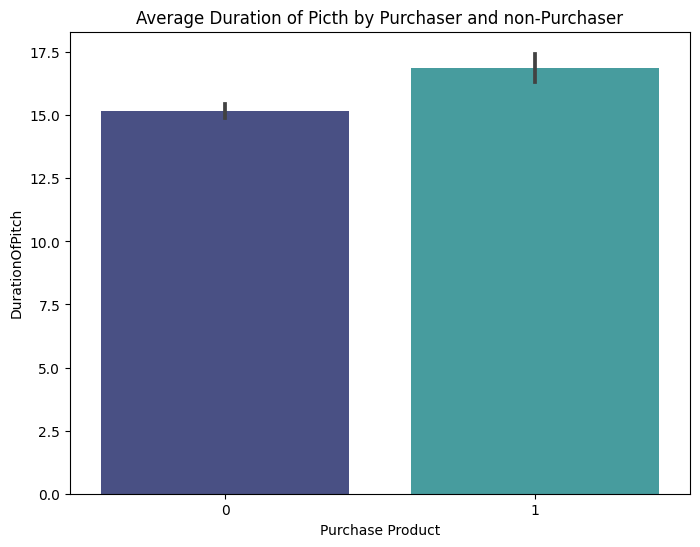

In [ ]:
# Plot the Average Duration of Picth by ProdTaken
plt.figure(figsize=(8, 6))
ax = sns.barplot(x='ProdTaken', y='DurationOfPitch', data=df,palette='mako')
plt.xlabel('Purchase Product')
plt.ylabel('DurationOfPitch')
plt.title('Average Duration of Picth by Purchaser and non-Purchaser')


plt.show()

While the average pitching duration of customers who purchased packages is only slightly higher than the average pitching duration of customers who did not buy.